## Example to load the network, sample 4 levels at random from the latent space and then plot them using matplotlib.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
#!cp 'path/to/file' 'path/to/drive'

In [16]:
import os
os.chdir("../exercise_DL_pcg")

In [17]:
!dir

 Volume in drive D is Data
 Volume Serial Number is 684D-858A

 Directory of d:\Documents\LAVORI\ITU\Modern AI\Labs\modern-ai-course\lecture-09\exercise_DL_pcg

15/09/2021  21:17    <DIR>          .
15/09/2021  21:17    <DIR>          ..
15/09/2021  20:28        46.794.090 all_levels_onehot.npz
15/09/2021  21:16               821 example_sampling_random_levels.py
15/09/2021  21:16    <DIR>          models
15/09/2021  21:11             2.243 plotting_utilities.py
15/09/2021  21:18             1.003 readme.md
15/09/2021  21:17               255 requirements.txt
15/09/2021  20:50    <DIR>          sprites
15/09/2021  20:47             4.526 train_vae.py
15/09/2021  21:09             1.966 vae_mario.py
               7 File(s)     46.804.904 bytes
               4 Dir(s)  24.210.001.920 bytes free


In [19]:
import os
import torch
import matplotlib.pyplot as plt

from vae_mario import VAEMario
from plotting_utilities import plot_decoded_level

Matplotlib is building the font cache; this may take a moment.


In [21]:
# Loading the model
model_name = "mario_vae_zdim_2_overfitted"
z_dim = 2
vae = VAEMario(z_dim=z_dim)
vae.load_state_dict(torch.load(f"./models/{model_name}.pt"))


VAEMario(
  (encoder): Sequential(
    (0): Linear(in_features=2156, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (fc_mu): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (fc_var): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2156, bias=True)
  )
)


<All keys matched successfully>

In [22]:
# Sampling random zs
zs = 2.5 * torch.randn((4, z_dim))

In [23]:
# Getting levels from them using the decoder
levels = vae.decode(zs)
# print(levels.shape)
level_imgs = [plot_decoded_level(level) for level in levels]


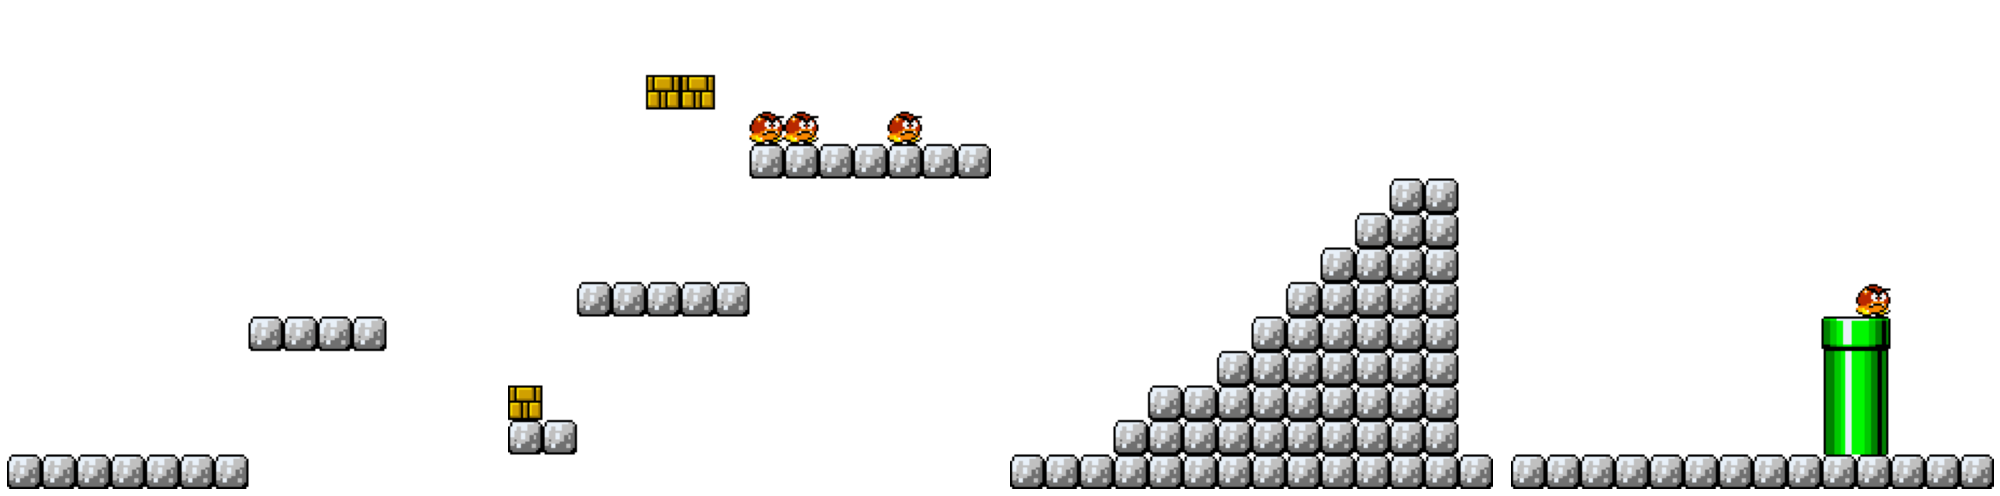

In [29]:
# Plotting
_, axes = plt.subplots(1, 4, figsize=(7 * 4, 7))
for level_img, ax in zip(level_imgs, axes):
    ax.imshow(level_img)
    ax.axis("off")

plt.tight_layout()
plt.show()


# Latent Variable Evolution Lab


## Sample from the VAE and then implement some search algorithm of choise to search the latent space for a particular level (e.g. one with many ground tiles)